### Open sequence files

In [7]:
from urllib.request import urlretrieve

genome_url = 'https://raw.githubusercontent.com/isaiah7123/bioinformatice/refs/heads/main/sequence.fasta'
genome_file_name = 'Fundulus_heteroclitus_GCES01003335.1.fasta'
urlretrieve(genome_url, genome_file_name)

('Fundulus_heteroclitus_GCES01003335.1.fasta',
 <http.client.HTTPMessage at 0x2843b50ef50>)

### Parse FASTA

In [19]:
def parse_fasta_file(input_file):
    """Return a dict of {id:gene_seq} pairs based on the sequences in the input FASTA file
    input_file -- a file handle for an input fasta file
    """
    parsed_seqs = {}
    curr_seq_id = None
    curr_seq = []

    for line in f:
        line = line.strip()

        if line.startswith(">"):
            if curr_seq_id is not None:
                parsed_seqs[curr_seq_id] = ''.join(curr_seq)

            curr_seq_id = line[1:]
            curr_seq = []
            continue

        curr_seq.append(line)

    parsed_seqs[curr_seq_id] = ''.join(curr_seq)
    return parsed_seqs

input_file = './Fundulus_heteroclitus_GCES01003335.1.fasta'

f = open(input_file)
parsed_seqs = parse_fasta_file(input_file)
print(parsed_seqs)

{'GCES01003335.1 TSA: Fundulus heteroclitus Funhe2Exx11m003788t2 transcribed RNA sequence': 'CCTGGACGCGTTGAGCTGCCTTTAAAGCCACTTTGTTGTTCTTGTTCGGACGTCGCTGCGTTGCCTCAGCATGTTGCCGAGCACGGCGCAGTACGCGATGAAGAAACGGAAGAAGCCGGTGCAGAAAACGCCCAAGCCTCCTCCGCCCGACGGCACCAAGTCCAACCCGTCCAAGCGCCACCGGGACCGTCTGAACGGCGAGCTGGACAAGCTCACCAGCCTGCTGCCCTTCCCCGAGGAGGTGCGGGCGCGGCTGGACAAGCTGTCGGTGCTGCGGCTCAGCGTGGGCTACCTGAAGGTGAAGAGCTTCTTTAACGCCGTCCTGAAAGCCGGCTCCAACGGCTCCAGCTGGACCGCCGAGCGGACCCCGGTGTTCGGAGGAAGCGTCCAGACCGCTCAGACCTTCGCCCCAGAGGCGACCTCCATCGACGGCGTCAGCTTCTCCGAGGCGGACCTGCTGCTGCAGGCGCTGAACGGCTTCGTGCTGGTGGTGACGGCCGAGGGCTACGTCTTCTACACGTCGCCCACCATCCAGGACTTCCTGGGCTTCCATCAGTCGGACGTGGTCCATCAGAGCGTCTTCGAGCTGATCCACGCAGACGACCGCGCGCTCTTCAGACGCCAGCTGCACTTCTCCCTCAACTCCGACGCCGACGGCTCCGAGAGTCCCAGTGAGCAGAGCAGCGCTGAGATCAGCACCAACGTGGTCGCCTACGACCTGCAGGCCATGCCTCCTGAGAACTCCTCCTTCCTGGAGAGGAACTTCTGCTGCCGCTTCCGCTGCCTCCTGGATAACTCCTCCGGCTTCCTGGCCCTCAACTTCCGCGGCCGGCTGAAGTTCCTGCACGGTCAGAACCGGCTGTCGGAGAACGGGGCGCTGGTCCCGCCGCAGCTGGCCCTGTTCGCC

### Similarity statistics

In [ ]:
def compare_seq(seq1, seq2) : 


### Similarities via heatmap
https://scanpy.readthedocs.io/en/stable/how-to/plotting-with-marsilea.html

In [21]:
!pip install scanpy

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 36.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 9.6/9.6 MB 80.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/785.6 kB ? eta -:--:--
   --------------------------------------- 785.6/785.6 kB 58.6 MB/s eta 0:00:00

   --- ------------------------------------  1/13 [numcodecs]
   ------------------ ---------------------  6/13 [array-api-compat]
   --------------------- ------------------  7/13 [zarr]
  Attempting uninstall: statsmodels
   --------------------- ------------------  7/13 [zarr]
   ------------------------ ---------------  8/13 [statsmodels]
    Found existing installation: statsmodels 0.14.4
   ------------------------ ---------------  8/13 [statsmodels]
   ------------------------ ---------------  8/13 [statsmodels]
   ------------------------ ---

In [24]:
import numpy as np
import scanpy as sc

pbmc = sc.datasets.pbmc3k_processed().raw.to_adata()
pbmc

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    obsp: 'distances', 'connectivities'

In [25]:
cell_markers = {
    "CD4 T cells": ["IL7R"],
    "CD14+ Monocytes": ["CD14", "LYZ"],
    "B cells": ["MS4A1"],
    "CD8 T cells": ["CD8A"],
    "NK cells": ["GNLY", "NKG7"],
    "FCGR3A+ Monocytes": ["FCGR3A", "MS4A7"],
    "Dendritic cells": ["FCER1A", "CST3"],
    "Megakaryocytes": ["PPBP"],
}

cells, markers = [], []
for c, ms in cell_markers.items():
    cells += [c] * len(ms)
    markers += ms

uni_cells = list(cell_markers.keys())
cell_colors = [
    "#568564",
    "#DC6B19",
    "#F72464",
    "#005585",
    "#9876DE",
    "#405559",
    "#58DADA",
    "#F85959",
]
cmapper = dict(zip(uni_cells, cell_colors))

In [33]:
!pip install marsilea


   ---------------------------------------- 2/2 [marsilea]



In [34]:
import marsilea as ma
import marsilea.plotter as mp

### Sample map

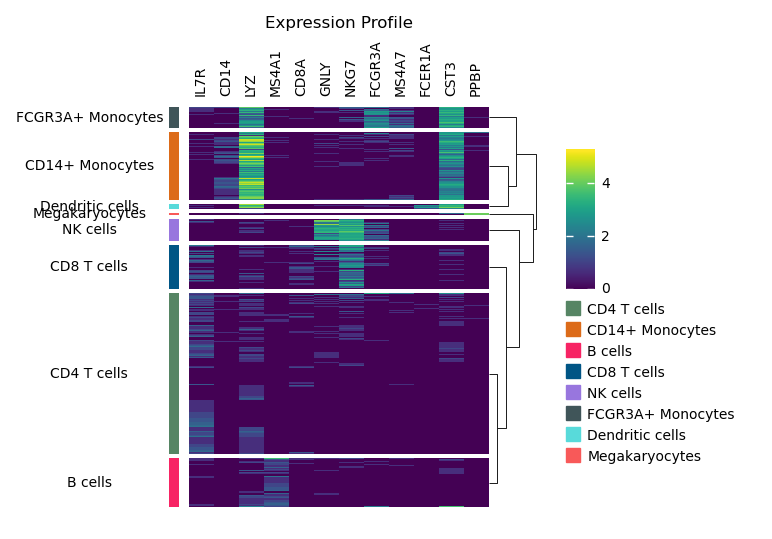

In [36]:
exp = pbmc[:, markers].X.toarray()

m = ma.Heatmap(exp, cmap="viridis", height=4, width=3)
m.group_rows(pbmc.obs["louvain"], order=uni_cells)

m.add_left(
    mp.Colors(list(pbmc.obs["louvain"]), palette=cmapper),
    size=0.1,
    pad=0.1,
)
m.add_left(mp.Chunk(uni_cells, rotation=0, align="center"))
m.add_top(mp.Labels(markers), pad=0.1)
m.add_dendrogram("right", add_base=False)

m.add_legends()
m.add_title("Expression Profile")
m.render()